# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos.

Este é um problema de renda de um cliente. A base de dados ("previsao_de_renda.csv") foi fornecida pela ebac e contém dados de clientes ficticios.

Nosso objetivo é construir um modelo preditivo para a renda de um cliente através de variáveis que podem ser observadas relacionadas às condições de vida e trabalho do cliente.

**Atividades do CRISP-DM:**

Objetivos do negócio
- O objetivo será prever a partir de alguns fatores qual é a renda prevista para um cliente.

Objetivos da modelagem
- O objetivo da modelagem será a criação de um modelo que faça a previsão da renda com uma taxa de acerto aceitável

## Etapa 2 Crisp-DM: Entendimento dos dados
Nesta etapa iremos importar e verificar os dados da base fornecida utilizando gráficos do tipo univariado e do tipo bivariado, também será feita uma análise utilizando o Pandas Profiling, que será exportado em um arquivo html com nome "renda_analisys.html" encontrado na pasta "output".


### Dicionário de dados

A segunda etapa é o entendimento dos dados. A base de dados possui 14 variáveis e uma variável resposta (em negrito na tabela).A tabela abaixo possui a descrição de cada variável assim como seu tipo. Cada linha corresponde a um cliente e cada coluna corresponde a uma das variáveis. 


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | datetime     |
| id_cliente              |  Identificação do cliente                           | int          |
| sexo                    |  Gênero do cliente                                  | String       |
| posse_de_veiculo        |  Possui veículo                                     | Boolean      |
| posse_de_imovel         |  Possui imóvel                                      | Boolean      |
| qtd_filhos              |  Quantos filhos possui                              | int          |
| tipo_renda              |  Tipo de renda                                      | String       |
| educacao                |  Escolaridade                                       | String       |
| estado_civil            |  Estado civil do cliente                            | String       |
| tipo_residencia         |  Tipo de residência do cliente                      | String       |
| idade                   |  Idade do cliente                                   | int          |
| tempo_emprego           |  Tempo de emprego no cliente                        | float        |
| qt_pessoas_residencia   |  Quantas pessoas moram na residência                | int          |
| **renda**               |  Renda do cliente                                   | float        |





#### Carregando os pacotes
Iremos inserir abaixo todos os pacotes que serão utilizados para este projeto

In [123]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [11]:
%matplotlib inline

#### Carregando os dados
Iremos carregar a base de dados utilizando o pandas para transforma-la em um DataFrame.

In [80]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Iremos utilizar o ProfileReport, gerando um arquivo html contendo gráficos e informações para cada variável isoladamente. Desta forma não iremos utilizar gráficos do python para a análise Univariada.

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas

Nesta etapa iremos analisar 2 variáveis em conjuntos e ver como se comportam


#### Gráfico de tipo de renda x renda 

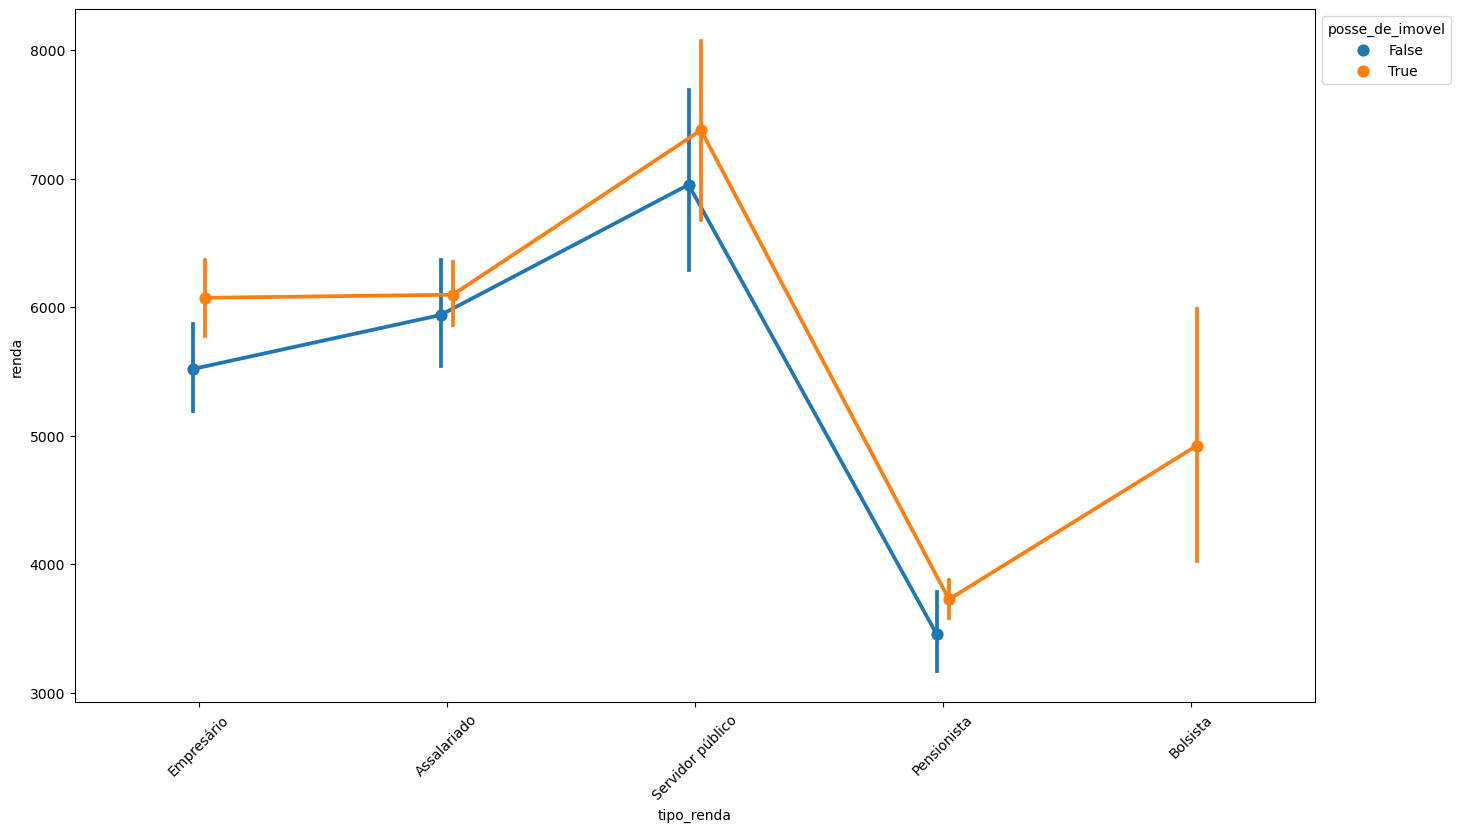

In [15]:
fig, ax = plt.subplots(figsize=(16,9))

grafico = sns.pointplot(data=renda, x='tipo_renda', y='renda', hue='posse_de_imovel', dodge=True, errorbar=('ci', 95))

grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Gráfico de renda por idade

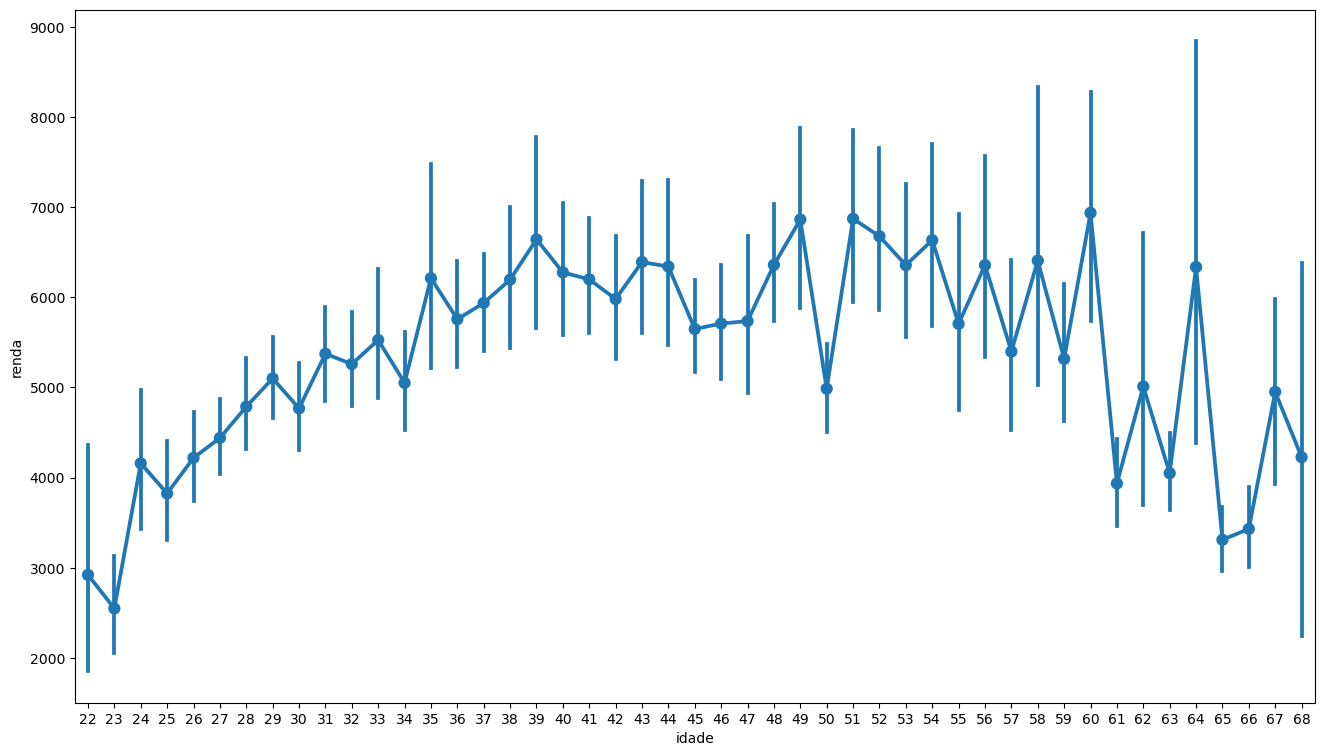

In [19]:
fig, ax = plt.subplots(figsize=(16,9))

grafico = sns.pointplot(data=renda, x='idade', y='renda', dodge=True, errorbar=('ci', 95))

#### Gráfico de quantidade de filhos por renda separado por posse de imóvel

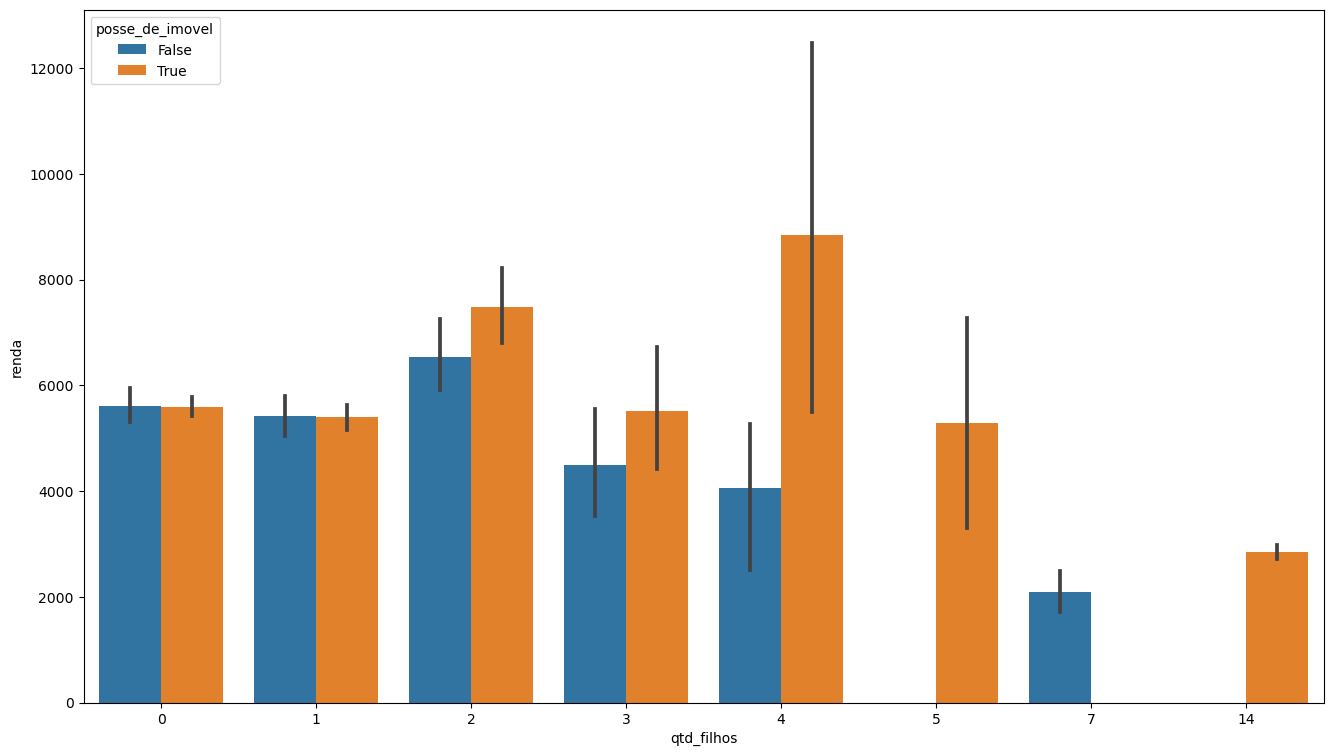

In [21]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.barplot(data=renda, x='qtd_filhos', y='renda', hue='posse_de_imovel', dodge=True, errorbar=('ci', 95))

#### Gráfico de Educação por renda separado por cada tipo de renda do cliente

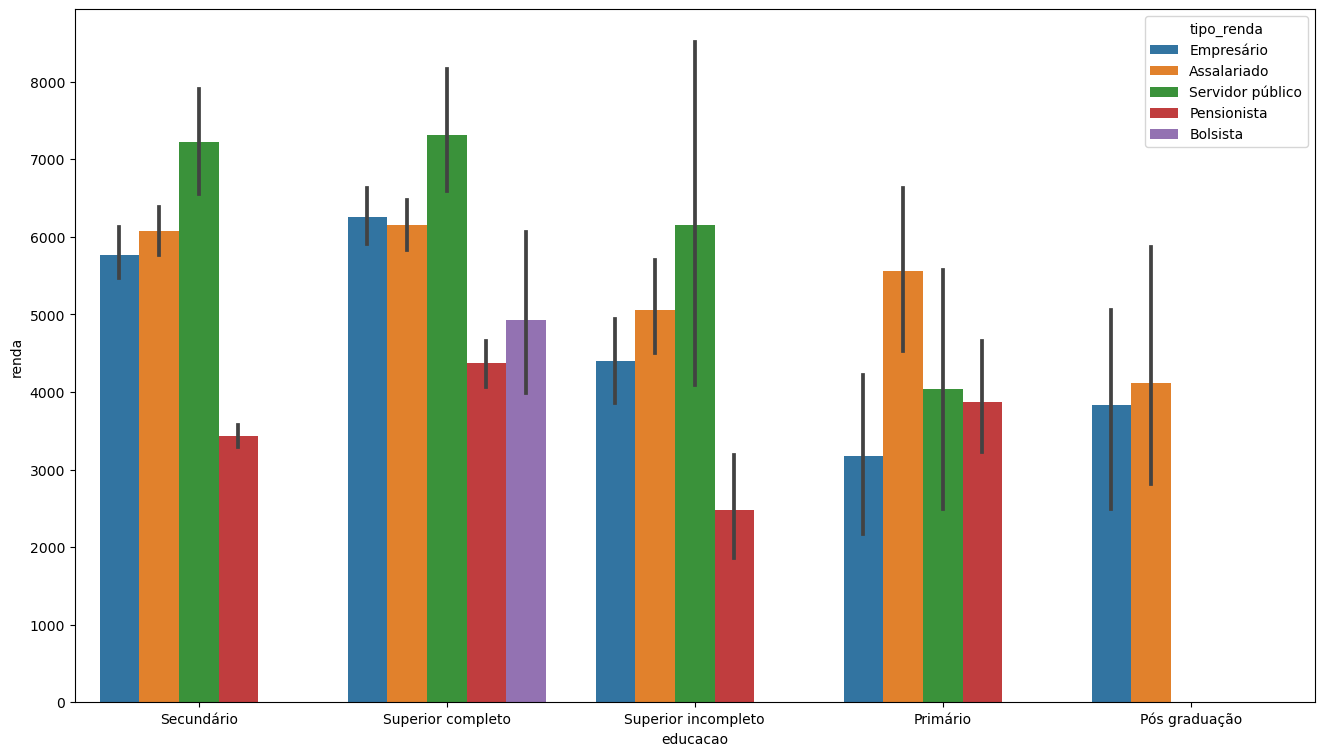

In [22]:
fig, ax = plt.subplots(figsize=(16,9))

ax = sns.barplot(data=renda, x='educacao', y='renda', hue='tipo_renda', dodge=True, errorbar=('ci', 95))

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Para iniciar a preparação dos dados, primeiro iremos verificar os tipos das variáveis e se todas estão fazendo sentido para o projeto


In [24]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

primeiramente, irei remover as variáveis id_cliente e Unnamed: 0, pois uma é uma variável sem nome e a outra é um identificador que não irá auxiliar na modelagem

In [81]:
renda = renda.drop(['Unnamed: 0', 'id_cliente'], axis=1)
renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


Em seguida, como a única variável com valores nulos é a variável tempo_emprego, e a quantidade é baixa, simplesmente irei remover as linhas com valores nulos

In [82]:
renda = renda.dropna()
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   sexo                   12427 non-null  object 
 2   posse_de_veiculo       12427 non-null  bool   
 3   posse_de_imovel        12427 non-null  bool   
 4   qtd_filhos             12427 non-null  int64  
 5   tipo_renda             12427 non-null  object 
 6   educacao               12427 non-null  object 
 7   estado_civil           12427 non-null  object 
 8   tipo_residencia        12427 non-null  object 
 9   idade                  12427 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  12427 non-null  float64
 12  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.2+ MB


removendo linhas duplicadas

In [83]:
renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)
print(renda.shape)

(12090, 13)


Criando dummies para variáveis do tipo String (object)

In [84]:
renda = pd.get_dummies(renda, 
                       columns=['data_ref', 'sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], 
                       drop_first=True, dtype='int64')
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
data_ref_2015-02-01                int64
data_ref_2015-03-01                int64
data_ref_2015-04-01                int64
data_ref_2015-05-01                int64
data_ref_2015-06-01                int64
data_ref_2015-07-01                int64
data_ref_2015-08-01                int64
data_ref_2015-09-01                int64
data_ref_2015-10-01                int64
data_ref_2015-11-01                int64
data_ref_2015-12-01                int64
data_ref_2016-01-01                int64
data_ref_2016-02-01                int64
data_ref_2016-03-01                int64
sexo_M                             int64
tipo_renda_Bolsista                int64
tipo_renda_Empresário              int64
tipo_renda_Pensi

In [85]:
renda[['posse_de_veiculo', 'posse_de_imovel']] = renda[['posse_de_veiculo', 'posse_de_imovel']].astype('int64')

In [71]:
renda.head()

,data_ref,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,0,1,0,26,6.602740,1.0,8060.34,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2015-01-01,1,1,0,28,7.183562,2.0,1852.15,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,1,1,0,35,0.838356,2.0,2253.89,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,0,1,1,30,4.846575,3.0,6600.77,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,1,0,0,33,4.293151,1.0,6475.97,1,0,...,0,0,1,0,0,0,0,0,0,1


## Etapa 4 Crisp-DM: Modelagem

Os modelos selecionados serão DecisionTreeRegressor, RandomForestRegressor e ExtraTreesRegressor, onde iremos analisar e verificar qual o melhor modelo para esta base de dados.



In [72]:
# funcao para avaliar o modelo com r2 e RSME
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo: {nome_modelo}\nR2: {r2:.2%}\nRSME: {RSME:.2f}'

In [93]:
modelo_rf = RandomForestRegressor()
modelo_dt = DecisionTreeRegressor(max_depth=4)
modelo_dt2 = DecisionTreeRegressor(max_depth=6)
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest' : modelo_rf,
          'DecisionTreeRegressor' : modelo_dt,
          'DecisionTreeRegressor 2': modelo_dt2,
          'ExtraTrees' : modelo_et,
          }

In [88]:
y = renda['renda']
X = renda.drop('renda', axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Rodando o modelo


In [94]:
for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo: RandomForest
R2: 38.49%
RSME: 5966.39
Modelo: DecisionTreeRegressor
R2: 41.04%
RSME: 5841.40
Modelo: DecisionTreeRegressor 2
R2: 36.37%
RSME: 6068.47
Modelo: ExtraTrees
R2: 24.70%
RSME: 6601.50


Melhor modelo de acordo com resultados de R2 e RSME é o DecisionTreeRegressor com max_depth = 4, desta forma iremos focar neste modelo, realizando ajustes e ver se conseguimos melhorar o resultado do modelo


In [110]:
modelo_dt3 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

In [111]:
modelo_dt3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

In [112]:
previsao = modelo_dt3.predict(X_test)

## Etapa 5 Crisp-DM: Avaliação dos resultados


Demonstrando a avaliação do modelo final

In [113]:
print(avaliar_modelo('DecisionTreeRegressor max_depth=4 min_samples_leaf = 20', y_test, previsao))

Modelo: DecisionTreeRegressor max_depth=4 min_samples_leaf = 20
R2: 43.38%
RSME: 5724.21


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.